<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

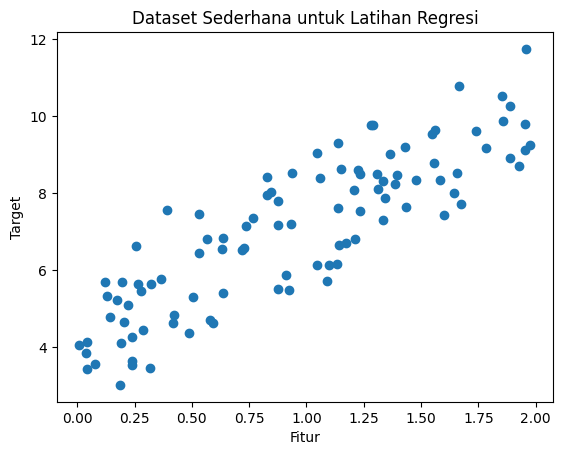

Koefisien (slope): 2.968467510701019
Intersep: 4.222151077447231

Metrik Regresi:
R^2: 0.75 (10 points)
RMSE: 1.00 (10 points)
MAE: 0.85 (10 points)
MSE: 0.99 (10 points)
MAPE: 13.43% (10 points)


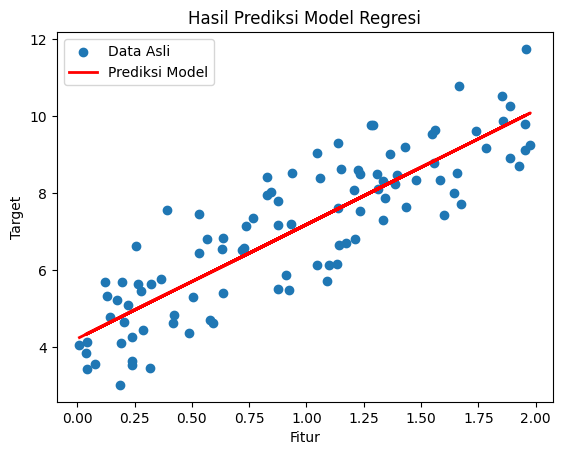

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Buat dataset sederhana
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Fitur
y = 4 + 3 * X + np.random.randn(100, 1)  # Target (dengan sedikit noise)

# Plot dataset
plt.scatter(X, y)
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.title('Dataset Sederhana untuk Latihan Regresi')
plt.show()

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model menggunakan data
model.fit(X, y)

# Koefisien (slope) dan intersep dari model
slope = model.coef_[0][0]
intercept = model.intercept_[0]

print("Koefisien (slope):", slope)
print("Intersep:", intercept)

# Prediksi menggunakan model
y_pred = model.predict(X)

# Hitung metrik regresi
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Cetak metrik
print("\nMetrik Regresi:")
print(f'R^2: {r2:.2f} (10 points)')
print(f'RMSE: {rmse:.2f} (10 points)')
print(f'MAE: {mae:.2f} (10 points)')
print(f'MSE: {mse:.2f} (10 points)')
print(f'MAPE: {mape:.2f}% (10 points)')

# Plot hasil prediksi
plt.scatter(X, y, label='Data Asli')
plt.plot(X, y_pred, color='red', label='Prediksi Model', linewidth=2)
plt.xlabel('Fitur')
plt.ylabel('Target')
plt.title('Hasil Prediksi Model Regresi')
plt.legend()
plt.show()

Metrik Klasifikasi:
Akurasi: 0.94 (10 points)
Presisi: 0.95 (10 points)
Recall: 0.94 (5 points)
F1 Score: 0.94 (5 points)


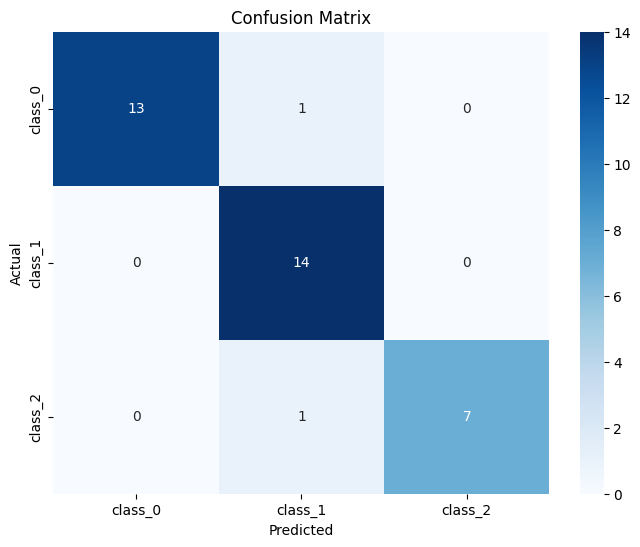

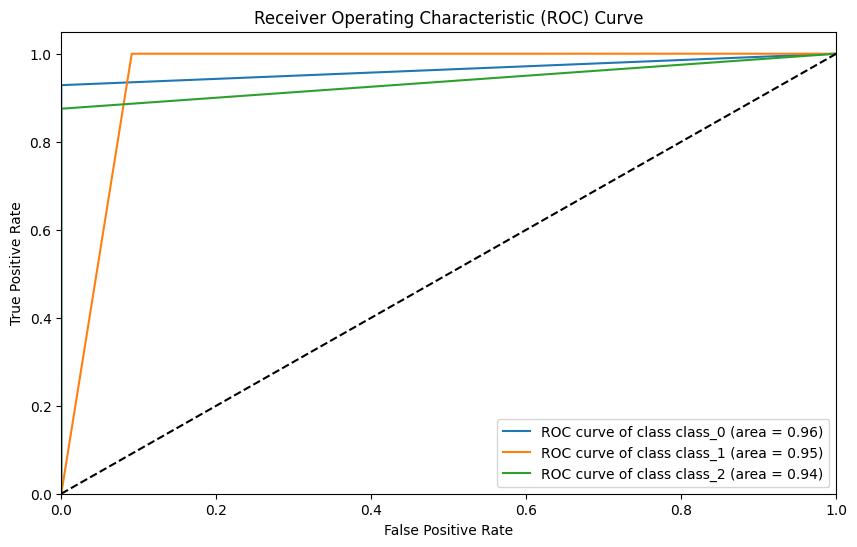

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Muat dataset
wine = load_wine()

# Konversi dataset ke dalam DataFrame pandas
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model pohon keputusan
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Prediksi menggunakan model
y_pred = clf.predict(X_test)

# Hitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Cetak metrik
print("Metrik Klasifikasi:")
print(f'Akurasi: {accuracy:.2f} (10 points)')
print(f'Presisi: {precision:.2f} (10 points)')
print(f'Recall: {recall:.2f} (5 points)')
print(f'F1 Score: {f1:.2f} (5 points)')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
# Note: ROC curve is typically used for binary classification.
# For multi-class, we can use One-vs-Rest approach.

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {wine.target_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()